In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as smt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA

from sklearn.model_selection import train_test_split
from keras.models import Sequential
pd.pandas.set_option('display.max_columns', None)
from pmdarima import auto_arima

Using TensorFlow backend.


In [2]:
df = pd.read_csv('Final_Data_3_28.csv', parse_dates=True)
df.head()

,TIME,STREET,DIRECTION,Avarage,Cong,S_length,BUS_COUNT,MESSAGE_COUNT,HOUR,DAY_OF_WEEK,MONTH,Zip,maxtempc,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex2,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,3/15/2018 10:50,Fairbanks,SB,14,0.47,0.40,2,9,10,5,3,21182,5,0,0,11.6,1,1,2,6:18 AM,5:11 PM,7:02 AM,6:57 PM,-3,1,4,1,12,6,64,0,1012,3,10,202,10
1,3/16/2018 14:31,Lake Shore Dr,SW,0,0.00,0.50,0,0,14,6,3,21192,1,-2,0,8.7,1,1,0,6:50 AM,6:12 PM,7:01 AM,6:58 PM,-8,-4,0,-4,15,98,52,0,1022,0,10,63,13
2,3/21/2018 0:40,Higgins,NW,0,0.00,2.47,0,0,0,4,3,4448,2,-1,0,10.3,1,1,27,9:28 AM,11:42 PM,6:52 AM,7:04 PM,-5,-6,0,-6,31,100,68,0,1014,0,10,38,23
3,3/20/2018 22:31,130th,EB,30,1.00,3.07,1,5,22,3,3,4460,1,-2,0,11.6,1,1,20,8:52 AM,10:33 PM,6:54 AM,7:03 PM,-5,-5,1,-5,33,100,66,0,1015,1,10,27,25
4,3/20/2018 4:20,Dr Martin L King Jr,NB,0,0.00,9.04,0,0,4,3,3,4301,1,-2,0,11.6,1,1,20,8:52 AM,10:33 PM,6:54 AM,7:03 PM,-6,-8,-1,-8,37,8,68,0,1014,-1,10,46,28


In [3]:
df['TIME'] = df['TIME'].astype('datetime64[ns]')

In [4]:
# df['TIME']=pd.to_datetime(df['TIME'], format = '%d%b%Y:%H:%M:%S.%f')

In [5]:
df.columns

Index(['TIME', 'STREET', 'DIRECTION', 'Avarage', 'Cong', 'S_length',
       'BUS_COUNT', 'MESSAGE_COUNT', 'HOUR', 'DAY_OF_WEEK', 'MONTH', 'Zip',
       'maxtempc', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex2', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [6]:
col_list = ['TIME', 'STREET', 'DIRECTION', 'Avarage', 'Cong', 'S_length','BUS_COUNT',
            'MESSAGE_COUNT','windspeedKmph', 'mintempC']

In [7]:
df_p = df[col_list]
df_p.head()

,TIME,STREET,DIRECTION,Avarage,Cong,S_length,BUS_COUNT,MESSAGE_COUNT,windspeedKmph,mintempC
0,2018-03-15 10:50:00,Fairbanks,SB,14,0.47,0.40,2,9,10,0
1,2018-03-16 14:31:00,Lake Shore Dr,SW,0,0.00,0.50,0,0,13,-2
2,2018-03-21 00:40:00,Higgins,NW,0,0.00,2.47,0,0,23,-1
3,2018-03-20 22:31:00,130th,EB,30,1.00,3.07,1,5,25,-2
4,2018-03-20 04:20:00,Dr Martin L King Jr,NB,0,0.00,9.04,0,0,28,-2


In [8]:
df_p.shape

(123647, 10)

In [9]:
df_p['TIME'].dt.day.unique()

array([15, 16, 21, 20, 19, 17, 18, 14], dtype=int64)

In [10]:
df_Fairbanks_SB= df_p[(df_p['STREET']=='Fairbanks') & (df_p['DIRECTION']=='SB')]
df_Fairbanks_SB.shape

(1001, 10)

In [11]:
df_Fairbanks_SB = df_Fairbanks_SB.sort_values(by='TIME')
df_Fairbanks_SB.head()

,TIME,STREET,DIRECTION,Avarage,Cong,S_length,BUS_COUNT,MESSAGE_COUNT,windspeedKmph,mintempC
119727,2018-03-14 13:20:00,Fairbanks,SB,20,0.67,0.4,2,3,19,-4
25806,2018-03-14 13:30:00,Fairbanks,SB,15,0.50,0.4,3,10,19,-4
123202,2018-03-14 13:40:00,Fairbanks,SB,14,0.47,0.4,7,33,19,-4
104929,2018-03-14 13:50:00,Fairbanks,SB,17,0.57,0.4,1,4,19,-4
91227,2018-03-14 14:01:00,Fairbanks,SB,14,0.47,0.4,6,28,21,-4


In [12]:
df_Fairbanks_SB_T = df_Fairbanks_SB[(df_Fairbanks_SB['TIME'].dt.day == 14)|(df_Fairbanks_SB['TIME'].dt.day == 15)|(df_Fairbanks_SB['TIME'].dt.day == 16)|(df_Fairbanks_SB['TIME'].dt.day == 17)|(df_Fairbanks_SB['TIME'].dt.day == 18)|(df_Fairbanks_SB['TIME'].dt.day == 19)]
df_Fairbanks_SB_T.shape

(752, 10)

In [13]:
# df_Fairbanks_SB_T = df_Fairbanks_SB_T.sort_values(by='TIME')
df_Fairbanks_SB_T.head()

,TIME,STREET,DIRECTION,Avarage,Cong,S_length,BUS_COUNT,MESSAGE_COUNT,windspeedKmph,mintempC
119727,2018-03-14 13:20:00,Fairbanks,SB,20,0.67,0.4,2,3,19,-4
25806,2018-03-14 13:30:00,Fairbanks,SB,15,0.50,0.4,3,10,19,-4
123202,2018-03-14 13:40:00,Fairbanks,SB,14,0.47,0.4,7,33,19,-4
104929,2018-03-14 13:50:00,Fairbanks,SB,17,0.57,0.4,1,4,19,-4
91227,2018-03-14 14:01:00,Fairbanks,SB,14,0.47,0.4,6,28,21,-4


In [14]:
df_Fairbanks_SB_Ts = df_Fairbanks_SB[(df_Fairbanks_SB['TIME'].dt.day == 20)|(df_Fairbanks_SB['TIME'].dt.day == 21)]
df_Fairbanks_SB_Ts.shape

(249, 10)

In [15]:
df_Fairbanks_SB_T = df_Fairbanks_SB_T.sort_values(by='TIME')
df_Fairbanks_SB_Ts.head()

,TIME,STREET,DIRECTION,Avarage,Cong,S_length,BUS_COUNT,MESSAGE_COUNT,windspeedKmph,mintempC
56559,2018-03-20 00:01:00,Fairbanks,SB,25,0.83,0.4,2,12,27,-2
60155,2018-03-20 00:10:00,Fairbanks,SB,20,0.67,0.4,1,3,27,-2
116357,2018-03-20 00:20:00,Fairbanks,SB,24,0.80,0.4,1,12,27,-2
53065,2018-03-20 00:30:00,Fairbanks,SB,24,0.80,0.4,1,9,27,-2
74173,2018-03-20 00:40:00,Fairbanks,SB,10,0.33,0.4,1,4,27,-2


In [149]:
col_list_2 = ['TIME','Cong']
Train = df_Fairbanks_SB_T[col_list_2]
Test = df_Fairbanks_SB_Ts[col_list_2]
Total = df_Fairbanks_SB[col_list_2]
print('Total Dim: ', Total.shape)
print('Train dim: ',Train.shape)
print('Test dim: ',Test.shape)

Total Dim:  (1001, 2)
Train dim:  (752, 2)
Test dim:  (249, 2)


In [215]:
tt= Total.copy()
tt.shape

(1001, 2)

In [216]:
tt.head(20)

,TIME,Cong
119727,2018-03-14 13:20:00,0.67
25806,2018-03-14 13:30:00,0.50
123202,2018-03-14 13:40:00,0.47
104929,2018-03-14 13:50:00,0.57
91227,2018-03-14 14:01:00,0.47
115869,2018-03-14 14:10:00,0.53
51957,2018-03-14 14:20:00,0.70
87446,2018-03-14 14:31:00,0.70
59224,2018-03-14 14:40:00,0.53
117346,2018-03-14 14:50:00,0.67


In [217]:
tt['TIME']=tt['TIME'].dt.round('10min')
tt.head(20)

,TIME,Cong
119727,2018-03-14 13:20:00,0.67
25806,2018-03-14 13:30:00,0.50
123202,2018-03-14 13:40:00,0.47
104929,2018-03-14 13:50:00,0.57
91227,2018-03-14 14:00:00,0.47
115869,2018-03-14 14:10:00,0.53
51957,2018-03-14 14:20:00,0.70
87446,2018-03-14 14:30:00,0.70
59224,2018-03-14 14:40:00,0.53
117346,2018-03-14 14:50:00,0.67


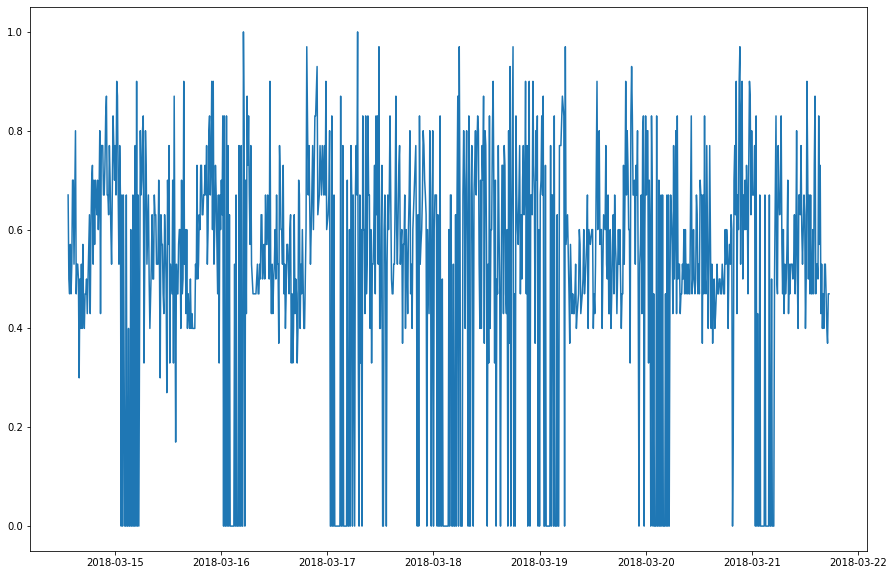

In [218]:
plt.figure(figsize = (15,10))
plt.plot(tt['TIME'], tt['Cong']);

In [219]:
tt.loc[tt['Cong']==0.0]

,TIME,Cong
16978,2018-03-15 01:20:00,0.0
103335,2018-03-15 01:40:00,0.0
78022,2018-03-15 02:10:00,0.0
101910,2018-03-15 02:20:00,0.0
108447,2018-03-15 02:40:00,0.0
...,...,...
74119,2018-03-21 04:10:00,0.0
75764,2018-03-21 04:20:00,0.0
95530,2018-03-21 04:40:00,0.0
91129,2018-03-21 04:50:00,0.0


In [220]:
tt['Cong'] = tt['Cong'].replace(0.0, 0.50)

In [221]:
tt.loc[tt['Cong']==0.0]

,TIME,Cong


In [222]:
tt.shape

(1001, 2)

In [223]:
tt = tt.set_index('TIME').asfreq('10Min')

In [224]:
tt.shape

(1034, 1)

In [225]:
tt.head(20)

,Cong
TIME,
2018-03-14 13:20:00,0.67
2018-03-14 13:30:00,0.50
2018-03-14 13:40:00,0.47
2018-03-14 13:50:00,0.57
2018-03-14 14:00:00,0.47
2018-03-14 14:10:00,0.53
2018-03-14 14:20:00,0.70
2018-03-14 14:30:00,0.70
2018-03-14 14:40:00,0.53


In [214]:
# tt.iloc[:,0]==pd.np.nan
# pd.isnull(tt.iloc[:,0])

tt.groupby([tt.index.day, tt.index.hour]).transform(lambda x: x.fillna(x.mean()))

C:\Users\mosto\Anaconda3\envs\RTX-GPU\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Cong
TIME,
2018-03-14 13:20:00,None
2018-03-14 13:30:00,None
2018-03-14 13:40:00,None
2018-03-14 13:50:00,None
2018-03-14 14:00:00,None
...,...
2018-03-21 16:50:00,None
2018-03-21 17:00:00,None
2018-03-21 17:10:00,None


In [236]:
tt.loc[tt['Cong']>0]

,Cong
TIME,
2018-03-14 13:20:00,0.67
2018-03-14 13:30:00,0.50
2018-03-14 13:40:00,0.47
2018-03-14 13:50:00,0.57
2018-03-14 14:00:00,0.47
...,...
2018-03-21 16:50:00,0.47
2018-03-21 17:00:00,0.40
2018-03-21 17:10:00,0.37


In [210]:
tt.tail(5)

,Cong
TIME,
2018-03-21 16:50:00,0.47
2018-03-21 17:00:00,0.40
2018-03-21 17:10:00,0.37
2018-03-21 17:20:00,0.47
2018-03-21 17:30:00,0.47


In [235]:
for i, row in tt.iterrows():
#     a=0.0
    
    if row.Cong>0.0:
        pass
    else:
        print(row.Cong)
        b=0.5
#         print(row.Index)
        tt.at[i,'Cong']=b
        
        
#         df=df.mask(df==0).fillna(df.mean())

In [237]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = tt.iloc[:746]
test = tt.iloc[745:]

fitted_model = ExponentialSmoothing(train['Cong'], trend='mul',seasonal= 'mul',seasonal_periods=144).fit()


C:\Users\mosto\Anaconda3\envs\RTX-GPU\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\mosto\Anaconda3\envs\RTX-GPU\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [238]:
test_predictions = fitted_model.forecast(288)

In [239]:
test_predictions

2018-03-19 17:40:00    0.468253
2018-03-19 17:50:00    0.520224
2018-03-19 18:00:00    0.540110
2018-03-19 18:10:00    0.514016
2018-03-19 18:20:00    0.462686
                         ...   
2018-03-21 16:50:00    0.398658
2018-03-21 17:00:00    0.422375
2018-03-21 17:10:00    0.374872
2018-03-21 17:20:00    0.434407
2018-03-21 17:30:00    0.422036
Freq: 10T, Length: 288, dtype: float64

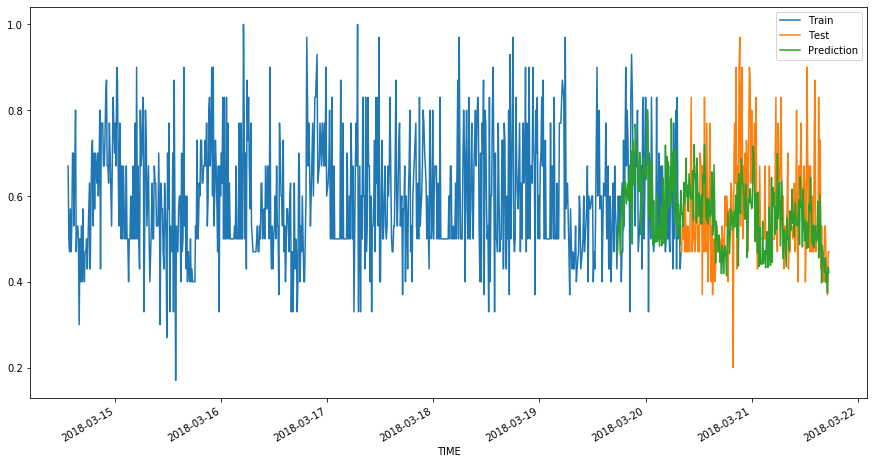

In [240]:
train_data['Cong'].plot(legend=True,label='Train',figsize=(15,8))
test_data['Cong'].plot(legend=True,label='Test')
test_predictions.plot(legend=True,label='Prediction')

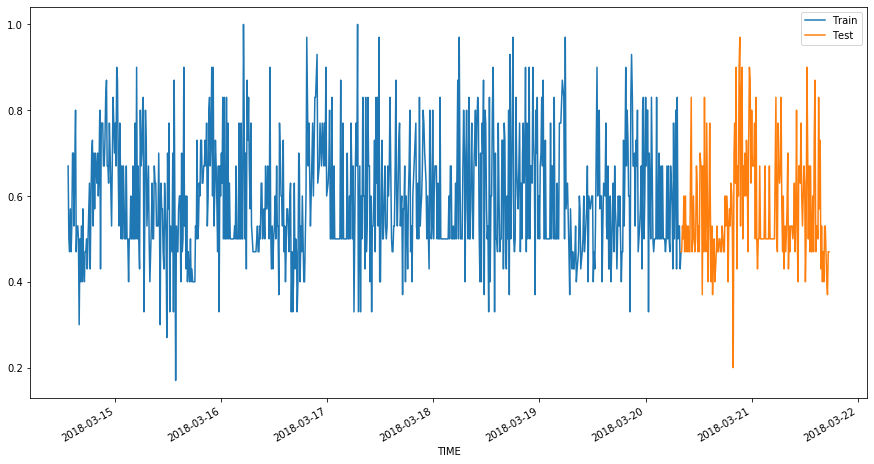

In [241]:
train_data['Cong'].plot(legend=True,label='Train',figsize=(15,8))
test_data['Cong'].plot(legend=True,label='Test')
# test_predictions.plot(legend=True,label='Prediction')

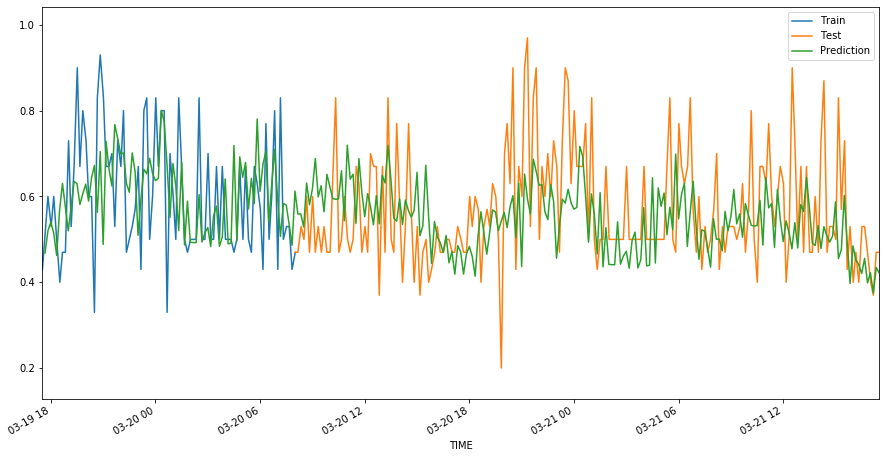

In [242]:
train_data['Cong'].plot(legend=True,label='Train',figsize=(15,8))
test_data['Cong'].plot(legend=True,label='Test')
test_predictions.plot(legend=True,label='Prediction',xlim=['2018-03- 17:30:00','2018-03-21 17:30:00'])

C:\Users\mosto\Anaconda3\envs\RTX-GPU\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


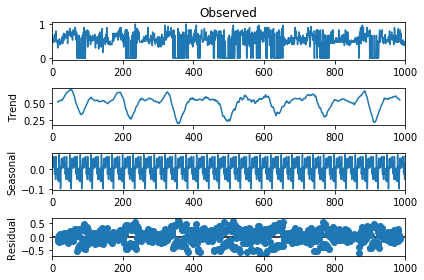

In [243]:
result = seasonal_decompose(Total.Cong.values, freq=30)  # model='mul' also works
result.plot();

In [25]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [26]:
adf_test(Total)

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.765351e+00
p-value                 2.726015e-09
# lags used             1.600000e+01
# observations          9.840000e+02
critical value (1%)    -3.437013e+00
critical value (5%)    -2.864482e+00
critical value (10%)   -2.568336e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [27]:
stepwise_fit = auto_arima(Total['Cong'],start_p=0, start_q=0, max_p=6, max_q=3, seasonal=False, trace=True)

Performing stepwise search to minimize aic
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=143.708, BIC=153.525, Time=0.109 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=107.527, BIC=122.253, Time=0.064 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=119.848, BIC=134.575, Time=0.132 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=1718.753, BIC=1723.662, Time=0.036 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=38.823, BIC=58.458, Time=0.167 seconds
Fit ARIMA: (3, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-41.865, BIC=-17.321, Time=0.267 seconds
Fit ARIMA: (4, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-51.431, BIC=-21.978, Time=0.329 seconds
Fit ARIMA: (5, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-52.092, BIC=-17.731, Time=0.399 seconds
Fit ARIMA: (6, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=-58.576, BIC=-19.306, Time=0.448 seconds
Fit ARIMA: (6, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=-58.319, BIC=-14.140, Time=1.522 seco

In [28]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1001
Model:               SARIMAX(6, 0, 0)   Log Likelihood                  37.288
Date:                Thu, 02 Apr 2020   AIC                            -58.576
Time:                        03:17:59   BIC                            -19.306
Sample:                             0   HQIC                           -43.652
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1678      0.020      8.321      0.000       0.128       0.207
ar.L1          0.0286      0.025      1.130      0.259      -0.021       0.078
ar.L2          0.1732      0.025      6.978      0.000       0.125       0.222
ar.L3          0.2394      0.026      9.111      0.000       0.188       0.291
ar.L4          0.0882      0.026      3.434      0.001       0.038       0.139
ar.L5          0.0484      0.025      1.932      0.053      -0.001       0.098
ar.L6          0.0917      0.025      3.707      0.000       0.043       0.140
sigma2         0.0543      0.003     20.455      0.000       0.049       0.060
===================================================================================
Ljung-Box (Q):                       39.95   Jarque-Bera (JB):                25.66
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -0.36
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
len(Total)
# Total.head()

1001

In [30]:
train = Total.iloc[:800]
test = Total.iloc[800:]

In [31]:
model = ARMA(train['Cong'],order=(3,1))
results = model.fit()
results.summary()

C:\Users\mosto\Anaconda3\envs\RTX-GPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Cong   No. Observations:                  800
Model:                     ARMA(3, 1)   Log Likelihood                  -8.614
Method:                       css-mle   S.D. of innovations              0.245
Date:                Thu, 02 Apr 2020   AIC                             29.227
Time:                        03:17:59   BIC                             57.335
Sample:                             0   HQIC                            40.025
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5063      0.025     20.617      0.000       0.458       0.554
ar.L1.Cong     0.5080      0.111      4.590      0.000       0.291       0.725
ar.L2.Cong     0.1627      0.040      4.068      0.000       0.084       0.241
ar.L3.Cong     0.1573      0.055      2.843      0.004       0.049       0.266
ma.L1.Cong    -0.5074      0.111     -4.560      0.000      -0.725      -0.289
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1241           -0.0000j            1.1241           -0.0000
AR.2           -1.0790           -2.1189j            2.3778           -0.3250
AR.3           -1.0790           +2.1189j            2.3778            0.3250
MA.1            1.9708           +0.0000j            1.9708            0.0000
-----------------------------------------------------------------------------
"""

In [32]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=True).rename('ARMA(3,1) Predictions')

C:\Users\mosto\Anaconda3\envs\RTX-GPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [33]:
title='Chicago Traffic Congestion'
ylabel='Congestion Ratio'
xlabel=''

ax = test['Cong'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

ValueError: view limit minimum -35998.736493055556 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -35998.736493055556 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [ ]:
from statsmodels.tools.eval_measures import mse,rmse

error1 = mse(test['Cong'], predictions)
error2 = rmse(test['Cong'], predictions)

In [ ]:
print(error1)
print(error2)

In [ ]:
model = ARMA(Total['Cong'],order=(3,1))
results = model.fit()
fcast = results.predict(len(Total),len(Total)+38,typ='levels').rename('ARMA(3,1) Forecast')

In [ ]:
title = 'Chicago Traffic Congestion'
ylabel='Congestion Ratio'
xlabel=''

ax = Total.plot(legend=True,figsize=(16,10),title=title)
# fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
pd.DataFrame(Total).plot()